# `Class 1: Knowing the Data`

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.1 Conhecendo nossos dados e o Pandas


In [ ]:
# importando pandas
import pandas as pd


In [ ]:
# carregando arquivo
url = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv'

df_1 = pd.read_csv(url, sep=',')
df_1


In [ ]:
# verificando formato do DataFrama
df_1.shape


In [ ]:
# verificando nomes das colunas
df_1.columns


In [ ]:
# primeiras 10 linhas
df_1.head(10)


### 1.2 Primeiras visualizações 

In [ ]:
# plotando algumas informações
df_1['rating'].plot(kind='hist')


In [ ]:
# calculando média de uma coluna
media = df_1["rating"].mean()

# calculando mediana de uma coluna
mediana = df_1["rating"].median()

print(media)
print(mediana)


In [ ]:
# utilizando função `describe`
df_1["rating"].describe()


In [ ]:
# plotando algo com boxplot
sns.boxplot(df_1["rating"]) 


# `Class 2: Analyzing the Data`

### 2.1 Explorando os Dados

In [ ]:
# importando nova tabela com mais infos sobre os filmes
url2 = "https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv"

df_2 = pd.read_csv(
    url2,
    sep=","
)

df_2


In [ ]:
# média de notas relacionadas ao filme de id == 1
media1 = df_1.query("movieId == 1")["rating"].mean()

# podemos escrever essa mesma query acima da seguinte forma
media2 = df_1[df_1["movieId"] == 1]["rating"].mean()

print(media1)
print(media2)

In [ ]:
# agrupando informações por id do filme e trazendo a média de cada um deles
medias_por_filme = df_1.groupby("movieId")["rating"].mean()
medias_por_filme.head()


### 2.2 Distribuindo as Médias dos Filmes

In [ ]:
# gráfico de médias por filme
sns.boxplot(medias_por_filme)


In [ ]:
# utilizando describe() para comparar infos com o gráfico de boxplot
medias_por_filme.describe()

In [ ]:
# utilzando função do seaborn e matplotlib para mostrar um gráfico de dispersão 
sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")

# `Class 3: Understanding Variables Types`

### 3.1 Explorando a base de dados do TMDB

In [ ]:
# importando nova base de dados
df_3 = pd.read_csv("arquivos/tmdb_5000_movies.csv", sep=",")
df_3


In [ ]:
# plotando faturamento dos filmes 
sns.displot(df_3["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

In [ ]:
# verificando que tipo de informações há no DataFrame 
df_3.info()

In [ ]:
# Tratando os dados e tirando todos aquels que tem "revenue" == 0
com_faturamento = df_3.query("revenue > 0")

# plotando as informações que filtramos
sns.displot(com_faturamento["revenue"])
plt.show()

### 3.2 Tipos de Variáveis

In [ ]:
# mostrando valores únicos da coluan "original_language"
df_3["original_language"].unique()

# mostando o número de vezes que cada valor único, da coluna "original_language", aparece
df_3["original_language"].value_counts()

In [ ]:
# distribuição da média das notas do TMDB (vote_avarage) em que o número de votos (vote_count) seja maior que 10
df_votos_maior_dez = df_3.query("vote_count > 10")
df_media_votos = df_votos_maior_dez["vote_average"]

# plotando gráfico da informação que obitevemos
sns.displot(df_media_votos)
plt.title("Média dos votos dos Filmes com mais de 10 votos")
plt.xlabel("Média")
plt.ylabel("Qtd. votos")
plt.show()

# `Class 4: Viewing Data`

### 4.1 Visualizando Gráficos por Categoria

In [ ]:
# mostando o número de vezes que cada valor único, da coluna "original_language", aparece
total_por_lingua = df_3["original_language"].value_counts()

# Transformando a Serie obita em um DataFrama
total_por_lingua = total_por_lingua.to_frame()

# resentando o index para organizar os cabeçalhos
total_por_lingua = total_por_lingua.reset_index()

# modificando o nome das colunas para que estejam coesas com o que esta sendo mostrado
total_por_lingua.columns = ["original_language", "total"]

# plotando o gráfico das informações obtidas
sns.barplot(
    data=total_por_lingua,
    x="original_language",
    y="total",
    orient="h",
    hue="total",
    palette="coolwarm",
    errorbar=None
)

In [ ]:
# Podemos fazer extamente a mesma coisa que fizemos na célula anterior com menos código da seguinte forma:
ax = sns.countplot(
    data=df_3, 
    y="original_language",
    hue="original_language",
    palette="coolwarm"
)

### 4.2 Passando uma mensagem através de Visualização

In [ ]:
# Separando total de filme inglâs de não-inglês
total_ingles = total_por_lingua.loc[0, "total"]

# Somando valores da coluna total
total_geral = total_por_lingua["total"].sum()

# Subtração do total de  "outras linguas" pelo total de filmes em inglês 
total_resto = total_geral - total_ingles

total_por_lingua


In [ ]:
# criando um DataFrame a partir das variávels "total_ingles" e "total_geral"
dados = {
    "lingua": ["Inglês", "Outros"],
    "total": [total_ingles, total_resto]
}

# transformando para DataFrame
dados = pd.DataFrame(dados)
dados.head(10)

In [ ]:
# plotando um gráfico com essas informações
sns.barplot(
    dados, 
    x="total", 
    y="lingua", 
    hue="lingua", 
    palette="dark",
    errorbar=None
)
plt.title("Inglês x Outros")
plt.show()

### 4.3 Interpretando o propósito de uma Visualização

In [ ]:
# fazendo uma query que forneça o total, por grupo, de filmes que NÃO são originais do inglês 
outras_linguas = df_3.query("original_language != 'en'")
sns.countplot(
    data=outras_linguas,
    x="original_language"
)
plt.show()

# `Class 5: Adjusting the Visuals`

### 5.1 Gráfico de Dispersão com Retas de Regressão Linear

In [ ]:
# filtrando os dados para as colunas desejadas
dados = df_3[["title", "original_language", "budget", "revenue"]]
linguas = ["fr", "de", "es"]

# filtrando apenas as colunas que retornam True para as seguintes condicionais
filtro_linguas = dados.query("original_language == @linguas and revenue > 0 and budget > 0")

# construindo gráfico de dispersão mais a reta de regressão linear para cada caso
sns.lmplot(
    data=filtro_linguas,
    x="budget",
    y="revenue",
    col="original_language",
    hue="original_language",
    height=4,
    markers=["o", "s", "^"],
    scatter_kws={"s": 30, "alpha": 0.5}
)


### 5.2 Refinando uma Visualização

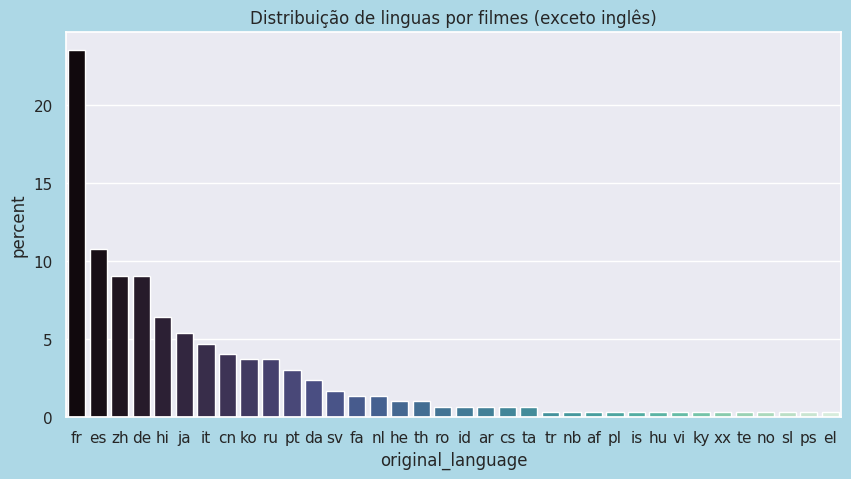

In [40]:
# variável utilizada para ordenadar as barras do gráfico. É inserida no parâmetro `order` da função `countplot()`
order = outras_linguas["original_language"].value_counts().index

# a função `figure()` do Matplotlib no ajuda a editar coisa do gráfico como: altura, largura, cor, resolução, etc.
plt.figure(
    figsize=(10, 5),
    facecolor="lightblue",
    edgecolor="black",
    num="first"
)

# melhorando gráfico de distribuição de linguas por filmes (exceto inglês)
sns.countplot(
    data=outras_linguas,
    x="original_language",
    order=order,
    palette="mako",
    hue="original_language",
    hue_order=order,
    stat="percent"
)
plt.title("Distribuição de linguas por filmes (exceto inglês)")
plt.show()

# `Class 6: Data Statistics`

### 6.1 Medidas de tendência central e desvio padrão

In [ ]:
# notas dadas aos filmes toy_story e jumanji
notas_toy_story = df_1.query("movieId == 1")["rating"].to_frame()
notas_jumanji = df_1.query("movieId == 2")["rating"].to_frame()



# média das notas dadas
media_toy_story = notas_toy_story.mean()
media_jumanji = notas_jumanji.mean()

print(media_toy_story)
print(media_jumanji)

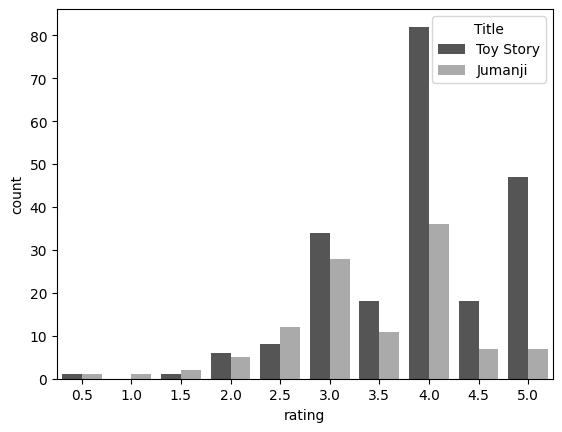

In [33]:
# DataFrame com as notas dadas para os dois filmes
notas_dos_filmes = df_1.query("movieId == 1 or movieId == 2")[["movieId", "rating"]]

# criando coluna nova com o título do filme usando como base a coluna movieId
notas_dos_filmes["Title"] = notas_dos_filmes["movieId"].apply(lambda filme: "Toy Story" if filme == 1 else "Jumanji")

# gráfico com o agrupamento pelas valores das notas dadas para cada filme
sns.countplot(
    notas_dos_filmes,
    x="rating",
    hue="Title",
    palette="grey"
)
plt.show()

### 6.2 Analisando a distribuição das notas dos filmes


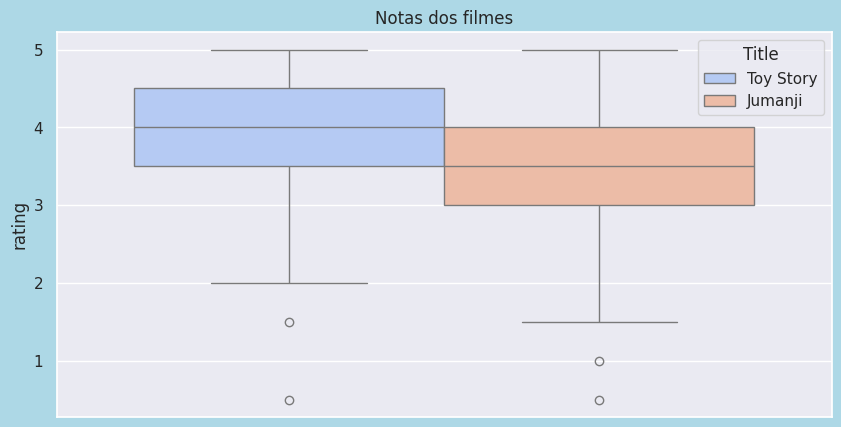

In [58]:
notas_toy_story
notas_jumanji

plt.figure(
    figsize=(10, 5),
    facecolor="lightblue",
    edgecolor="black",
    num="first"
)
sns.set_theme(style="darkgrid")
sns.boxplot(
    notas_dos_filmes,
    y="rating",
    hue="Title",
    palette="coolwarm"
)

plt.title("Notas dos filmes")
plt.show()